**Cell 1: Imports & Load Model**

In [11]:
import shap
import pandas as pd
import joblib

model = joblib.load("/content/model.pkl")
encoders = joblib.load("/content/encoders.pkl")

# Load dataset
df = pd.read_csv("/content/insurance_premium_dataset.csv")

**Cell 2: Encode Categorical Columns**

In [12]:
cat_cols = ["city", "locality_category", "policy_type", "occupation_type"]

for col in cat_cols:
    df[col] = encoders[col].transform(df[col])

**Cell 3: Prepare Features**

In [13]:
X = df.drop("annual_premium", axis=1)

**Cell 4: SHAP Explainer**

In [14]:
explainer = shap.Explainer(model)
shap_values = explainer(X)



**Cell 5: Global Explanation**

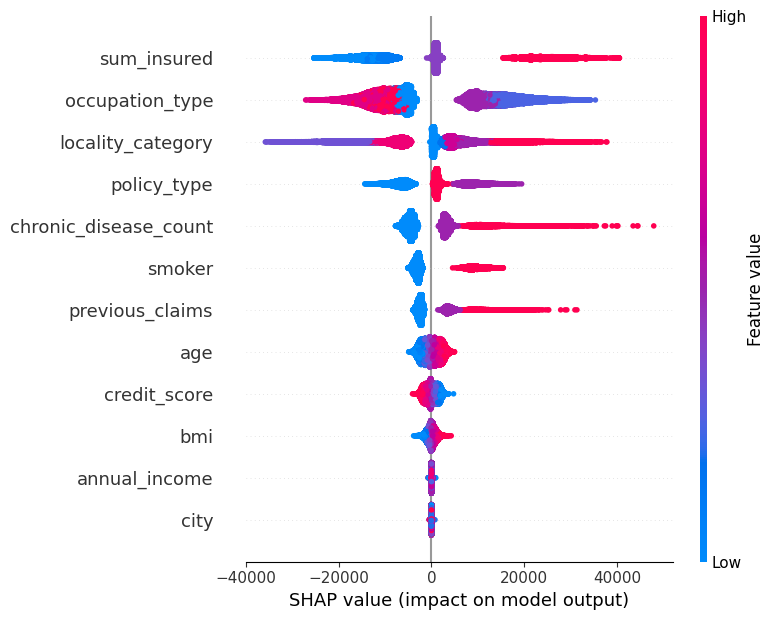

In [15]:
shap.summary_plot(shap_values, X)



**Cell 6: Bar Plot (Global Importance)**

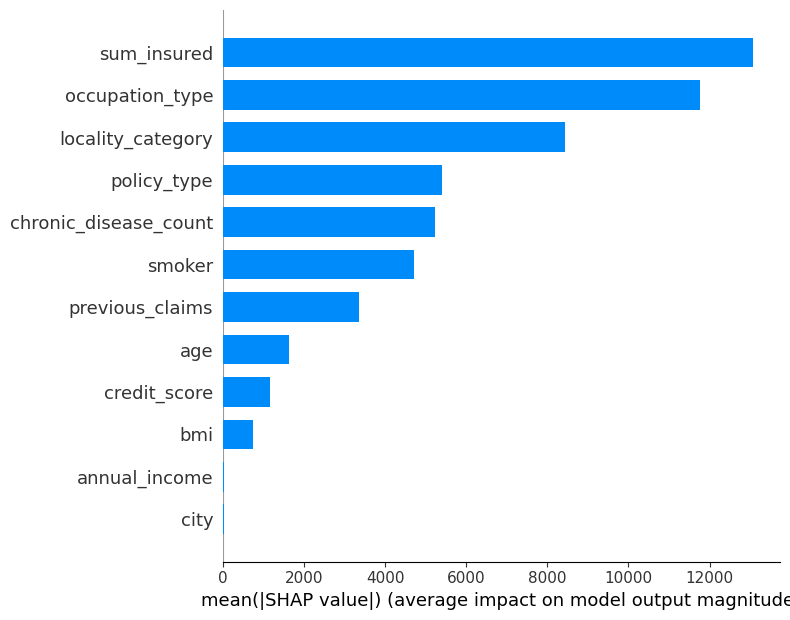

In [16]:
shap.summary_plot(shap_values, X, plot_type="bar")



**Cell 7: Individual Explanation**

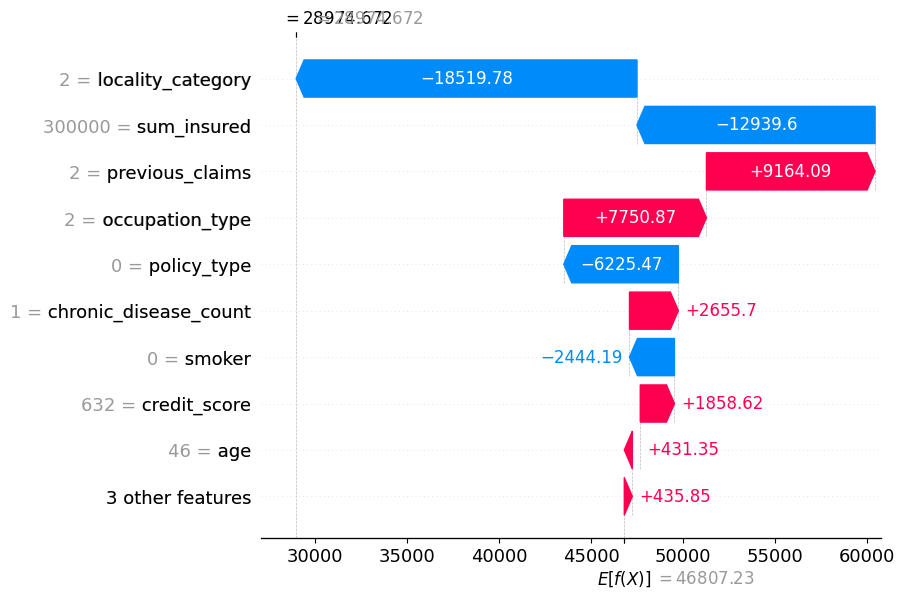

In [17]:
idx = 5
shap.plots.waterfall(shap_values[idx])


**Cell 8: Dependence Plot**

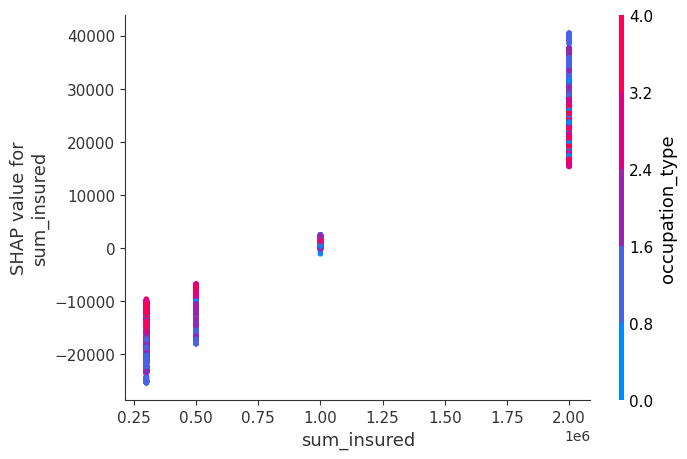

In [18]:
shap.dependence_plot("sum_insured", shap_values.values, X)
